In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/game_detection_ai
from matplotlib import pyplot as plt
import numpy as np
from train import load_datasets, create_inceptionv3_model, train_model
# autoreload
%load_ext autoreload
%autoreload 2

/content/drive/MyDrive/Colab Notebooks/game_detection_ai


In [4]:
from datareader.dataset import GameScreenShotDataset
import os

train_dataset = GameScreenShotDataset(
      root=os.path.join("/content/drive/MyDrive/dataset/train_new", "train"), transform=None
)

print(len(train_dataset))

26662


/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


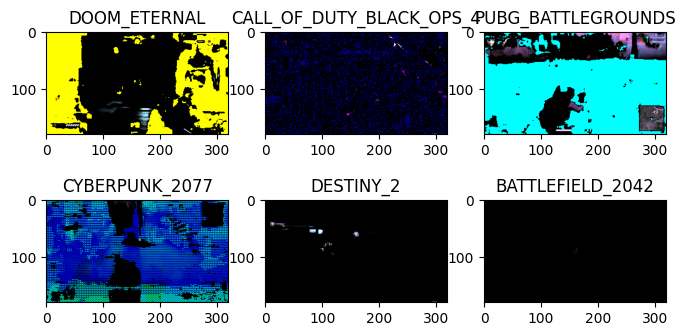

In [5]:
from torchvision import transforms as T
from matplotlib.colors import hsv_to_rgb

transform = T.Compose([
    T.Resize((180,320)),
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

train_dataset, val_dataset, test_dataset = load_datasets("/content/drive/MyDrive/dataset", transform)

# example
figure = plt.figure(figsize=(8, 4))
cols, rows = 3, 2
for i in range(1, cols * rows + 1):
    sample_idx = np.random.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]

    figure.add_subplot(rows, cols, i)
    plt.title(test_dataset.classes[label])
    img_rgb = hsv_to_rgb(img.numpy().transpose(1,2,0))
    plt.imshow(img_rgb)
plt.show()


In [ ]:
print(len(train_dataset))
print(len(test_dataset))
print(len(val_dataset))

15703
15000
15000


In [6]:
import torch
from torchvision.models import efficientnet_b4

model = efficientnet_b4()
in_features = model.classifier[1].in_features
model.classifier[1] = torch.nn.Linear(in_features, len(train_dataset.classes))
output = model(torch.randn(1, 3, 180, 320))
print(output)

tensor([[ 0.2005,  0.0544,  0.0293, -0.1337,  0.0320, -0.0171,  0.1951, -0.0226,
         -0.2330,  0.2240,  0.1068,  0.0346, -0.1169, -0.1457, -0.1197, -0.0061,
         -0.0188,  0.2371, -0.1012,  0.0324,  0.0077, -0.0488, -0.1339, -0.1418,
         -0.0261, -0.2374,  0.0866, -0.1686, -0.0294, -0.0204]],
       grad_fn=<AddmmBackward0>)


In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.90)
# start_epoch = 0

In [14]:
# Load model if provided
from train import load_model
continue_training_from = "/content/drive/MyDrive/Colab Notebooks/game_detection_ai/new-eff_11_(0.2517911998729687).pth"
if continue_training_from:
    model, optimizer, start_epoch = load_model(continue_training_from, model, optimizer=None)

In [ ]:
start_epoch=0

In [15]:
from train import train_model, test_model, inceptionv3_predict_fix

start_epoch, _ = train_model(
    model,
    val_dataset, # i figured out that google collab haven't upload all train set fully, so im gonna use validation for now
    num_epochs=10,
    cur_epoch=start_epoch,
    optimizer=optimizer,
    scheduler=scheduler,
    batch_size=32,
    limit_dataset_size=None,
    val_dataset=test_dataset,
    val_every=250, # do not val
    val_sample_size=300,
    # predict_fix=inceptionv3_predict_fix,
    seed=0,
    model_name="new-eff",
    dataloader_num_workers=8
)
# test_inceptionv3(model, test_dataset, batch_size=1, limit_dataset_size=1000)

Epoch 11/20:   0%|          | 0/469 [00:01<?, ?it/s, Loss=1]

Epoch 11/20:   0%|          | 1/469 [00:08<1:02:48,  8.05s/it, Loss=1]

Batch [0/469] Validation accuracy: 91.67%, Loss: 0.3220


Epoch 11/20:  53%|█████▎    | 250/469 [01:22<01:04,  3.37it/s, Loss=0.315]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Batch [250/469] Validation accuracy: 94.00%, Loss: 0.2575


Epoch [11/20], Loss: 0.3096 out of 469 batches


Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch [11/20] Validation accuracy: 0.40%, Loss: 89.5000


Epoch 12/20:   0%|          | 1/469 [00:08<1:08:24,  8.77s/it, Loss=1]

Batch [0/469] Validation accuracy: 89.33%, Loss: 0.3628


Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Batch [250/469] Validation accuracy: 91.67%, Loss: 0.3153


Epoch [12/20], Loss: 0.2884 out of 469 batches


Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch [12/20] Validation accuracy: 0.28%, Loss: 93.3000


Epoch 13/20:   0%|          | 1/469 [00:07<55:20,  7.09s/it, Loss=1]

Batch [0/469] Validation accuracy: 91.33%, Loss: 0.2666


Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Batch [250/469] Validation accuracy: 91.00%, Loss: 0.3510


Epoch [13/20], Loss: 0.2507 out of 469 batches


Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch [13/20] Validation accuracy: 0.22%, Loss: 93.6000


Epoch 14/20:   0%|          | 1/469 [00:14<1:56:05, 14.88s/it, Loss=1]

Batch [0/469] Validation accuracy: 93.33%, Loss: 0.2485


Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Batch [250/469] Validation accuracy: 92.67%, Loss: 0.3248


Epoch [14/20], Loss: 0.1971 out of 469 batches


Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch [14/20] Validation accuracy: 0.32%, Loss: 92.2000


Epoch 15/20:   0%|          | 1/469 [00:05<41:30,  5.32s/it, Loss=1]

Batch [0/469] Validation accuracy: 96.00%, Loss: 0.1650


Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Batch [250/469] Validation accuracy: 93.33%, Loss: 0.3040


Epoch [15/20], Loss: 0.1797 out of 469 batches


Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch [15/20] Validation accuracy: 0.25%, Loss: 93.4000


Epoch 16/20:   0%|          | 1/469 [00:05<45:08,  5.79s/it, Loss=1]

Batch [0/469] Validation accuracy: 93.00%, Loss: 0.2250


Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Batch [250/469] Validation accuracy: 92.67%, Loss: 0.3030


Epoch [16/20], Loss: 0.1746 out of 469 batches


Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch [16/20] Validation accuracy: 0.28%, Loss: 92.6000


Epoch 17/20:   0%|          | 1/469 [00:06<50:14,  6.44s/it, Loss=1]

Batch [0/469] Validation accuracy: 93.33%, Loss: 0.2633


Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Batch [250/469] Validation accuracy: 94.33%, Loss: 0.2827


Epoch [17/20], Loss: 0.1450 out of 469 batches


Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch [17/20] Validation accuracy: 0.20%, Loss: 95.0000


Epoch 18/20:   0%|          | 1/469 [00:05<43:06,  5.53s/it, Loss=1]

Batch [0/469] Validation accuracy: 93.33%, Loss: 0.2816


Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Batch [250/469] Validation accuracy: 94.67%, Loss: 0.3894


Epoch [18/20], Loss: 0.1331 out of 469 batches


Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch [18/20] Validation accuracy: 0.30%, Loss: 93.0000


Epoch 19/20:   0%|          | 1/469 [00:06<48:38,  6.24s/it, Loss=1]

Batch [0/469] Validation accuracy: 92.67%, Loss: 0.3078


Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Batch [250/469] Validation accuracy: 95.00%, Loss: 0.2207


Epoch [19/20], Loss: 0.1348 out of 469 batches


Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch [19/20] Validation accuracy: 0.28%, Loss: 93.5000


Epoch 20/20:   0%|          | 1/469 [00:03<28:56,  3.71s/it, Loss=1]

Batch [0/469] Validation accuracy: 96.33%, Loss: 0.1448


Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Batch [250/469] Validation accuracy: 96.67%, Loss: 0.1500


Epoch [20/20], Loss: 0.1151 out of 469 batches


Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch [20/20] Validation accuracy: 0.31%, Loss: 93.4000
Finished Training
[(11, 89.5), (12, 93.3), (13, 93.6), (14, 92.2), (15, 93.4), (16, 92.6), (17, 95.0), (18, 93.0), (19, 93.5), (20, 93.4)]


In [ ]:
from train import train_model, test_model, test_model_topk

test_model(model, test_dataset, batch_size=32, limit_dataset_size=100, seed=0, dataloader_num_workers=8)
# test_model_topk(model, val_dataset, batch_size=10, topk=10,limit_dataset_size=1000, seed=0)

(0.2574360807921039, 92.0)